<a href="https://colab.research.google.com/github/ganesh1616/Ganesh_INFO5731_Fall2024/blob/main/Ganesh_Marada_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter, defaultdict
from textblob import TextBlob
import time

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Step 1: Fetch data from the IMDB reviews link
def fetch_reviews(url, review_count=100):
    reviews = []
    pagination_key = ''
    while len(reviews) < review_count:
        response = requests.get(url + pagination_key)
        if response.status_code != 200:
            break
        soup = BeautifulSoup(response.text, 'html.parser')
        review_containers = soup.findAll("div", {"class": "lister-item-content"})
        for container in review_containers:
            review = container.find("div", {"class": "text show-more__control"})
            if review:
                reviews.append(review.get_text())
            if len(reviews) >= review_count:
                break
        pagination_element = soup.find("div", {"class": "load-more-data"})
        pagination_key = pagination_element['data-key'] if pagination_element else ''
    return reviews

reviews = fetch_reviews("https://www.imdb.com/title/tt15398776/reviews/_ajax?paginationKey=")


In [ ]:
# Step 2: Preprocess text data
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [word for word in word_tokenize(text) if word not in stop_words]
    return ' '.join(words)

processed_reviews = [preprocess_text(review) for review in reviews]

In [ ]:
# Step 3: Calculate N-gram frequencies (N=3)
all_words = ' '.join(processed_reviews).split()
trigrams = list(ngrams(all_words, 3))
trigram_freq = Counter(trigrams)

In [ ]:
# Output trigram frequencies
print("Trigram Frequencies:")
print(trigram_freq.most_common(10))

Trigram Frequencies:
[(('j', 'robert', 'oppenheimer'), 21), (('robert', 'downey', 'jr'), 18), (('downey', 'jr', 'emily'), 5), (('jr', 'emily', 'blunt'), 5), (('blunt', 'florence', 'pugh'), 5), (('dark', 'knight', 'trilogy'), 4), (('emily', 'blunt', 'florence'), 4), (('general', 'leslie', 'groves'), 4), (('world', 'war', 'ii'), 4), (('christopher', 'nolan', 'movie'), 4)]


In [ ]:
# Step 4: Calculate bigram probabilities
bigrams = list(ngrams(all_words, 2))
bigram_freq = Counter(bigrams)
unigram_freq = Counter(all_words)
bigram_prob = {bigram: bigram_freq[bigram] / unigram_freq[bigram[0]] for bigram in bigram_freq}

In [ ]:
# Output bigram probabilities
print("\nBigram Probabilities:")
for bigram, prob in list(bigram_prob.items())[:10]:
    print(f"{bigram}: {prob:.4f}")


Bigram Probabilities:
('youll', 'wits'): 0.3333
('wits', 'brain'): 1.0000
('brain', 'fully'): 1.0000
('fully', 'switched'): 0.2857
('switched', 'watching'): 0.5000
('watching', 'oppenheimer'): 0.2353
('oppenheimer', 'could'): 0.0097
('could', 'easily'): 0.1176
('easily', 'get'): 0.1111
('get', 'away'): 0.0250


In [ ]:
# Step 5: Extract noun phrases and calculate relative probabilities
import nltk
nltk.download('brown')
!python -m textblob.download_corpora
noun_phrases = set()
for review in processed_reviews:
    blob = TextBlob(review)
    noun_phrases.update(blob.noun_phrases)

noun_phrase_freqs = defaultdict(list)
max_freq = {np: 0 for np in noun_phrases}

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
# Calculate relative frequency for each noun phrase in each review
for review in processed_reviews:
    review_nps = TextBlob(review).noun_phrases
    for np in noun_phrases:
        freq = review_nps.count(np)
        noun_phrase_freqs[np].append(freq)
        max_freq[np] = max(max_freq[np], freq)

In [ ]:
# Calculate relative probabilities and format output in a table
rel_prob_df = pd.DataFrame({
    np: [freq / max_freq[np] if max_freq[np] > 0 else 0 for freq in freqs]
    for np, freqs in noun_phrase_freqs.items()
})

rel_prob_df.index = [f"Review-{i+1}" for i in range(len(processed_reviews))]
print("\nNoun Phrase Relative Probabilities:")
print(rel_prob_df.head())


Noun Phrase Relative Probabilities:
          perspective oppenheimer  general matt damon reason  \
Review-1                      0.0                        0.0   
Review-2                      0.0                        0.0   
Review-3                      0.0                        0.0   
Review-4                      0.0                        0.0   
Review-5                      0.0                        0.0   

          captivating musical score creates  problem story development lacks  \
Review-1                                0.0                              0.0   
Review-2                                0.0                              0.0   
Review-3                                0.0                              0.0   
Review-4                                0.0                              0.0   
Review-5                                0.0                              0.0   

          hard overstate spot murphy oppenheimer  \
Review-1                                     

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import math
import requests
from bs4 import BeautifulSoup
import re
from time import sleep
from random import randint

# Scraping function to get IMDB reviews
def scrape_imdb_reviews(base_url, num_pages=1050):
    Reviewer = []
    Review_Description = []
    pagination_key = ''

    for i in range(1, num_pages + 1):
        url = base_url + pagination_key
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to retrieve page {i}. Skipping...")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        review_containers = soup.findAll("div", {"class": "lister-item-content"})
        if not review_containers:
            print("No more reviews found. Stopping.")
            break

        for container in review_containers:
            review_description = container.find("div", {"class": "text show-more__control"})
            Review_Description.append(review_description.get_text(strip=True) if review_description else "No Description")

        pagination_element = soup.find("div", {"class": "load-more-data"})
        if pagination_element and 'data-key' in pagination_element.attrs:
            pagination_key = pagination_element['data-key']
        else:
            break

        sleep(randint(2, 5))  # Pause to avoid overloading the server

    return Review_Description



In [ ]:
# Text cleaning and processing functions
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [ ]:
# Calculating term frequency
def compute_tf(term, document):
    words = document.split()
    term_count = words.count(term)
    return term_count / len(words) if len(words) > 0 else 0

In [ ]:
# Calculating inverse document frequency
def compute_idf(term, documents):
    num_docs_containing_term = sum(1 for doc in documents if term in doc.split())
    return math.log(len(documents) / (1 + num_docs_containing_term))

In [ ]:
# Building the TF-IDF matrix
def build_tf_idf_matrix(documents):
    terms = set(word for doc in documents for word in doc.split())
    tf_idf_matrix = []

    for doc in documents:
        tf_idf_vector = {}
        for term in terms:
            tf = compute_tf(term, doc)
            idf = compute_idf(term, documents)
            tf_idf_vector[term] = tf * idf
        tf_idf_matrix.append(tf_idf_vector)

    return tf_idf_matrix, terms

In [ ]:
# Cosine similarity calculation
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[term] * vector2.get(term, 0) for term in vector1)
    magnitude1 = math.sqrt(sum(val**2 for val in vector1.values()))
    magnitude2 = math.sqrt(sum(val**2 for val in vector2.values()))
    return dot_product / (magnitude1 * magnitude2) if magnitude1 and magnitude2 else 0

In [ ]:
# Ranking documents by query similarity
def rank_documents(tf_idf_matrix, terms, query):
    query_tokens = set(clean_text(query).split())
    query_vector = {term: compute_tf(term, query) * compute_idf(term, [query]) for term in terms}
    similarities = [cosine_similarity(query_vector, doc_vector) for doc_vector in tf_idf_matrix]
    ranked_documents = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)
    return ranked_documents

In [ ]:
# Main code
base_url = "https://www.imdb.com/title/tt15398776/reviews/_ajax?paginationKey="
reviews = scrape_imdb_reviews(base_url)
cleaned_reviews = [clean_text(review) for review in reviews]

In [ ]:
from collections import defaultdict

#TF-IDF matrix construction
def build_tf_idf_matrix(documents):
    # Precompute IDF values for each term
    term_document_counts = defaultdict(int)
    for doc in documents:
        unique_terms = set(doc.split())
        for term in unique_terms:
            term_document_counts[term] += 1

    idf_values = {term: math.log(len(documents) / (1 + count)) for term, count in term_document_counts.items()}

    # Build TF-IDF matrix
    tf_idf_matrix = []
    for doc in documents:
        tf_idf_vector = {}
        word_count = len(doc.split())

        # Calculate TF-IDF for each term in the document
        for term in set(doc.split()):
            tf = doc.split().count(term) / word_count
            tf_idf_vector[term] = tf * idf_values.get(term, 0)

        tf_idf_matrix.append(tf_idf_vector)

    return tf_idf_matrix, set(idf_values.keys())


In [ ]:
# Define a sample query
query = "An Outstanding movie with a haunting performance and best character development"

In [ ]:
from collections import defaultdict
import math # Make sure to import math

# Assuming cleaned_reviews is available from previous code
tf_idf_matrix, terms = build_tf_idf_matrix(cleaned_reviews)  # Call the function to create tf_idf_matrix and terms

# Rank documents
ranked_docs = rank_documents(tf_idf_matrix, terms, query)

In [ ]:
import pandas as pd

# DataFrame with all reviews ranked by similarity
ranked_df = pd.DataFrame([(idx, score, reviews[idx]) for idx, score in ranked_docs],
                         columns=["Document Index", "Similarity Score", "Review"])

# Display the DataFrame
print(ranked_df)

      Document Index  Similarity Score  \
0               3067         -0.000400   
1               3047         -0.000445   
2               2581         -0.000521   
3               2496         -0.000594   
4               2021         -0.000625   
...              ...               ...   
4274              70         -0.145516   
4275             288         -0.145578   
4276            1963         -0.146416   
4277             206         -0.147378   
4278            2066         -0.161613   

                                                 Review  
0     Robert never like this nickname. He viewed it ...  
1     Finally got to see this film, having waited to...  
2     But just as Oppenheimer, for all his world-his...  
3     Very slow to start. To much jumping around. Sh...  
4     For Oppenheimer, an atomic bomb would be an ex...  
...                                                 ...  
4274  For me this movies is the best movie in this d...  
4275  A movie which Martin Scor

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here


from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# URL for scraping reviews
base_url = "https://www.imdb.com/title/tt15398776/reviews/_ajax?paginationKey="

# Collect reviews
Reviewer = []
Rating = []
Review_Summary = []
Review_Description = []
pagination_key = ''  # Start with an empty pagination key

for i in range(1, 20):  # Adjust as needed for review count
    url = base_url + pagination_key
    response = requests.get(url)

    # Check if the response was successful
    if response.status_code != 200:
        print(f"Failed to retrieve page {i}. Skipping...")
        continue

    soup = BeautifulSoup(response.text, 'html.parser')
    review_containers = soup.findAll("div", {"class": "lister-item-content"})

    # If no review containers are found, stop further scraping
    if not review_containers:
        print("No more reviews found. Stopping.")
        break

    for container in review_containers:
        # Collect review information
        review_description = container.find("div", {"class": "text show-more__control"})
        Review_Description.append(review_description.get_text(strip=True) if review_description else "No Description")

    # Get the next pagination key (if available)
    pagination_element = soup.find("div", {"class": "load-more-data"})
    if pagination_element and 'data-key' in pagination_element.attrs:
        pagination_key = pagination_element['data-key']
    else:
        print("No pagination key found. Ending scraping.")
        break

    print(f"Processed {i}th page")
    time.sleep(2)  # Pause to avoid overloading the server

Processed 1th page
Processed 2th page
Processed 3th page
Processed 4th page
Processed 5th page
Processed 6th page
Processed 7th page
Processed 8th page
Processed 9th page
Processed 10th page
Processed 11th page
Processed 12th page
Processed 13th page
Processed 14th page
Processed 15th page
Processed 16th page
Processed 17th page
Processed 18th page
Processed 19th page


In [ ]:
# Create a DataFrame with the collected reviews
df = pd.DataFrame({"Description": Review_Description})
print(f"Collected {len(df)} reviews.")

Collected 472 reviews.


In [ ]:
# Preprocess the reviews for Word2Vec model training
def preprocess_text(text):
    return text.lower().split()

In [ ]:
# Tokenize all reviews
tokenized_reviews = [preprocess_text(review) for review in df["Description"]]

In [ ]:
# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, sg=1)
print("Word2Vec model trained successfully.")

Word2Vec model trained successfully.


In [ ]:
# Visualize the word embeddings
words = list(model.wv.index_to_key)
X = model.wv[words]

In [ ]:
# Fit a 2D PCA model to the vectors for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(X)

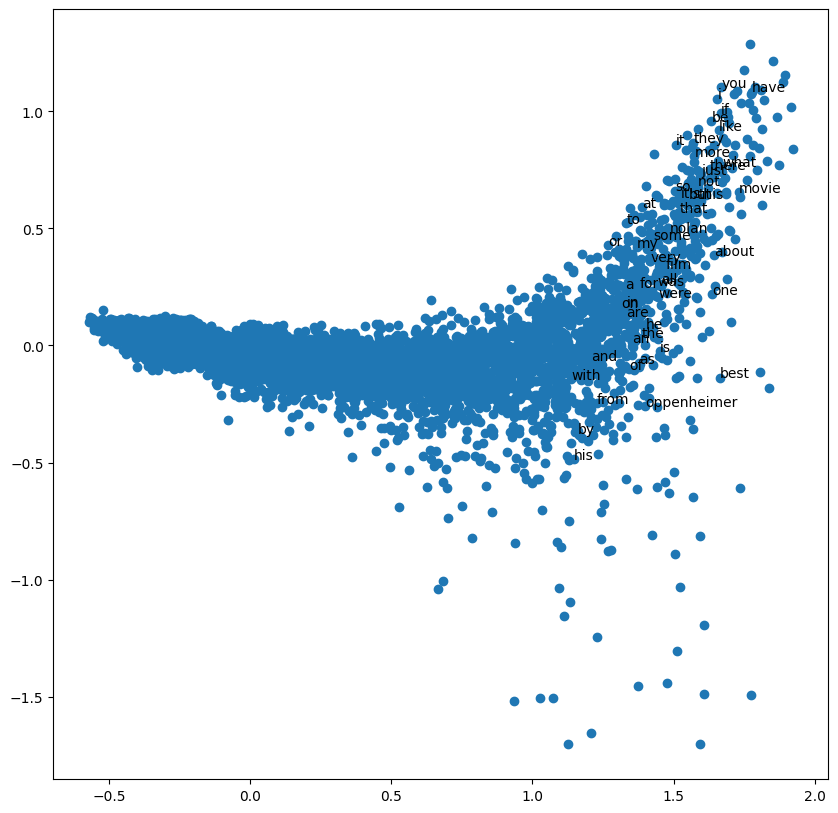

In [ ]:
# Plotting the result
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [7]:
# The GitHub link of your final csv file

#Link: https://github.com/ganesh1616/Ganesh_INFO5731_Fall2024/blob/main/movie_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [8]:
# Type your answer

"""
I developed a thorough understanding of text data processing and analysis methods, particularly for sentiment analysis and document rating, as a result of these assignments.
I began by learning how to efficiently acquire useful review data by automating web scraping from IMDb using BeautifulSoup and Selenium.
After that, I started working on text representation by creating a TF-IDF matrix from scratch.
This gave me a better understanding of the links between terms and documents and prepared me to use cosine similarity to rank documents according to a query.
By building a word embedding model with Word2Vec for 300-dimensional representation, I was able to identify semantic clusters and gain a practical grasp of the contextual interactions between words.
This comprehension was further enhanced by PCA visualization techniques.I was introduced to sentiment prediction methods through automatically annotating sentiment, which, when paired with what we had previously learned about manual annotation, provided me with a fair assessment of sentiment labeling efficiency and accuracy.
I finished the data lifecycle from collection to preparation by exporting the annotated dataset as a CSV, resulting in a resource that is prepared for additional NLP activities or model training.
All things considered, these exercises improved my Python proficiency, helped me better understand machine learning principles in natural language processing, and illustrated the value of effective code optimization—particularly when dealing with large datasets.

"""